# Lamin-A/C (LMNA)

The [LMNA gene](https://omim.org/entry/150330#geneMap) encodes for lamin A and lamin C, which together (with the addition of lamin B) create the nuclear lamina, which is essential to determining the nuclear size and shape from underneath the inner nuclear membrane. They are also found to be essential for nuclear growth, DNA replication, and apoptosis ([Gruenbaum et al. (2000)](https://pubmed.ncbi.nlm.nih.gov/10806082/)). 

There are 11 different syndromes that are associated with variants on LMNA. The five that we focus on in this analysis are all autosomal dominant.
1) [Cardiomyopathy, dilated, 1A](https://omim.org/clinicalSynopsis/115200) is characterized as having heart issues such as atrial fibrillation/flutter, congestive heart failure, ventricular arrhythmia, and congestive cardiomyopathy, along with Adams-Stokes attacks.
2) [Emery-Dreifuss muscular dystrophy 2, autosomal dominant](https://omim.org/clinicalSynopsis/181350) is characterized as having heart issues including dialated cardiomyopathy and cardiac arrhythmias, skeletal issues, and early onset muscle issues like humeroperoneal and distal lower limb muscle weakness or atrophy, and limb-girdle muscle weakness. 
3) [LMNA-related congenital muscular dystrophy](https://omim.org/clinicalSynopsis/613205) is typically diagnosed prenatally or in early infancy. It's characterized as having delayed motor development, decreased fetal movement, muscle weakness, severe hypotonia, rigid spine, floppy neck, and respiratory insufficiency. 
4) [Hutchinson-Gilford progeria](https://omim.org/clinicalSynopsis/176670) is usually diagnosed within the first two years of life and has a median life expectancy of 13 years. It is characterized as someone having short stature, prominent scalp veins, conductive hearing loss, multiple physical abnormalities, angina, myocardial infarction, elevated blood pressue, multiple skeletal issues, multiple skin issues, lipodystrophy, muscular atrophy, elevated platelet count, and increased risk of stroke.
5) [Lipodystrophy, familial partial, type 2](https://omim.org/clinicalSynopsis/151660) begins to show symptoms during puberty. It's characterized primarily through soft muscle tissue issues like partial lipodystrophy, loss of different adipose tissues, muscular hypertrophy, myalgia, and increased intramuscular/instraabdominal fat, along with xanthomata, prominent veins, hypertension, atherosclerosis, hepatomegaly, pancreatitis, and increased adipose tissue on face and neck. 


Several previous publications have reported candidate genotype-phenotype correlations on the LMNA gene.

[Captur et al. (2018)](https://openheart.bmj.com/content/openhrt/5/2/e000915.full.pdf) stated that: 

> "There was an association between more adverse cardiac phenotype and LMNA DNA location upstream of the NLS (p=0.014, OR 2.38, 95% CI 1.19 to 4.80). HCA repeated for mutations relative to the tail domain similarly showed an association of more adverse cardiac phenotype with mutations upstream of the tail (p=0.013, OR 2.34, 95% CI 1.18 to 4.60) compared with those in the tail."

[Hegele (2005)](https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1399-0004.2005.00447.x) stated that:

> "The odds ratio (OR) for a general association between an HCA class 1 laminopathy and amutation upstream of the NLS of LMNA was 8.4(95% confidence interval (CI) = 2.9 – 24.7). When only missense mutations were considered, this ORwas also 8.4 (95% CI = 2.8 – 25.1, p < 0.0001)."

Therefore, we tested missense vs other variants and variants upstream of NLS vs those downstream. For upstream variants, we tested both for overall phenotypes along with the cardiac phenotype severity. 


# Imports 

In [1]:
import hpotk
import gpsea

from IPython.display import display, HTML

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2024-08-13')
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {gpsea.__version__}")


Loaded HPO v2024-08-13
Using genophenocorr version 0.4.1.dev0


# Loading Phenopackets & Gene Variant Data

## Choose the preferred transcript and protein sequence

The prefered transcript can be found by searching on the gene symbol in [ClinVar](https://www.ncbi.nlm.nih.gov/clinvar/). By entering the accession number in [NCBI Nucleotide](https://www.ncbi.nlm.nih.gov/nuccore/?), you can find the corresponding protein accession number.


<span style='color: red'>IMPORTANT - gene symbol, mane TX accession, as well as the corresponding protein identifier should be tailored to your analysis!</span>

Here we use *WWOX* as an example:

In [2]:
gene_symbol = 'LMNA'
mane_tx_id = 'NM_005572.4'
mane_protein_id = 'NP_005563.1'

## Load phenopackets

Load phenopackets from Phenopacket Store:

In [3]:
from ppktstore.registry import configure_phenopacket_registry

phenopacket_store_release = '0.1.19'  # Update, if necessary
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

print(f'Loaded {len(phenopackets)} phenopackets')

Loaded 127 phenopackets


If Phenopacket Store is not an option, there are also other ways to load phenopackets.
Consult the [Input data](https://monarch-initiative.github.io/gpsea/stable/user-guide/input-data.html) section of the user guide.

## Create cohort

Transform the phenopackets into a cohort and perform Q/C:

In [4]:
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

cohort_creator = configure_caching_cohort_creator(hpo)

cohort, qc = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
print(f'Loaded {len(cohort)} individuals')

Individuals Processed: 100%|██████████| 127/127 [00:00<00:00, 489.34individuals/s]
Loaded 127 individuals


## Show Q/C issues (if any)

Test if there are any issues:

In [5]:
qc.summarize()

Validated under none policy
Showing errors and warnings
Phenopackets
  patient #2
    phenotype-features
     warnings:
     ·#0 HP:0002355 is an obsolete identifier for Gait disturbance. Replace HP:0002355 with the primary term ID HP:0001288
  patient #15
    phenotype-features
     warnings:
     ·#1 HP:0002355 is an obsolete identifier for Gait disturbance. Replace HP:0002355 with the primary term ID HP:0001288
  patient #18
    phenotype-features
     warnings:
     ·#2 HP:0002355 is an obsolete identifier for Gait disturbance. Replace HP:0002355 with the primary term ID HP:0001288
  patient #19
    phenotype-features
     warnings:
     ·#0 HP:0002355 is an obsolete identifier for Gait disturbance. Replace HP:0002355 with the primary term ID HP:0001288
  patient #20
    phenotype-features
     warnings:
     ·#1 HP:0002355 is an obsolete identifier for Gait disturbance. Replace HP:0002355 with the primary term ID HP:0001288
  patient #21
    phenotype-features
     warnings:
     

# Explore cohort

Generate reports to simplify exploring the cohort.

## Cohort summary

In [6]:
from gpsea.view import CohortViewable

cv = CohortViewable(hpo)
report = cv.process(cohort, transcript_id=mane_tx_id)
display(HTML(report))

HPO Term,ID,Seen in n individuals
Ankle contracture,HP:0034677,39
Elbow contracture,HP:0034391,37
Spinal rigidity,HP:0003306,37
Stiff neck,HP:0025258,36
Proximal muscle weakness in upper limbs,HP:0008997,35
Dilated cardiomyopathy,HP:0001644,27
Atrial fibrillation,HP:0005110,25
Arrhythmia,HP:0011675,23
Lipodystrophy,HP:0009125,21
Distal lower limb muscle weakness,HP:0009053,21


## Protein sequence effects

Summarize effects on the protein sequence

In [7]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizable, ProteinViewable


pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(mane_tx_id)
pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)

viewer = ProteinViewable()
html_prot = viewer.process(cohort, pvis)
display(HTML(html_prot))

Feature Name,Feature Type,Feature Coordinates,Variants in Feature
Interaction with MLIP,coiled_coil,1 - 130,26
Head,coiled_coil,1 - 33,7
Disordered,coiled_coil,1 - 25,6
IF rod,domain,31 - 387,67
Coil 1A,coiled_coil,34 - 70,13
Linker 1,coiled_coil,71 - 80,0
Coil 1B,coiled_coil,81 - 218,25
Linker 2,coiled_coil,219 - 242,5
Coil 2,coiled_coil,243 - 383,19
Necessary and sufficient for the interaction with IFFO1,coiled_coil,259 - 331,8


Plot variant distribution with respect to the protein sequence, domains, and other features

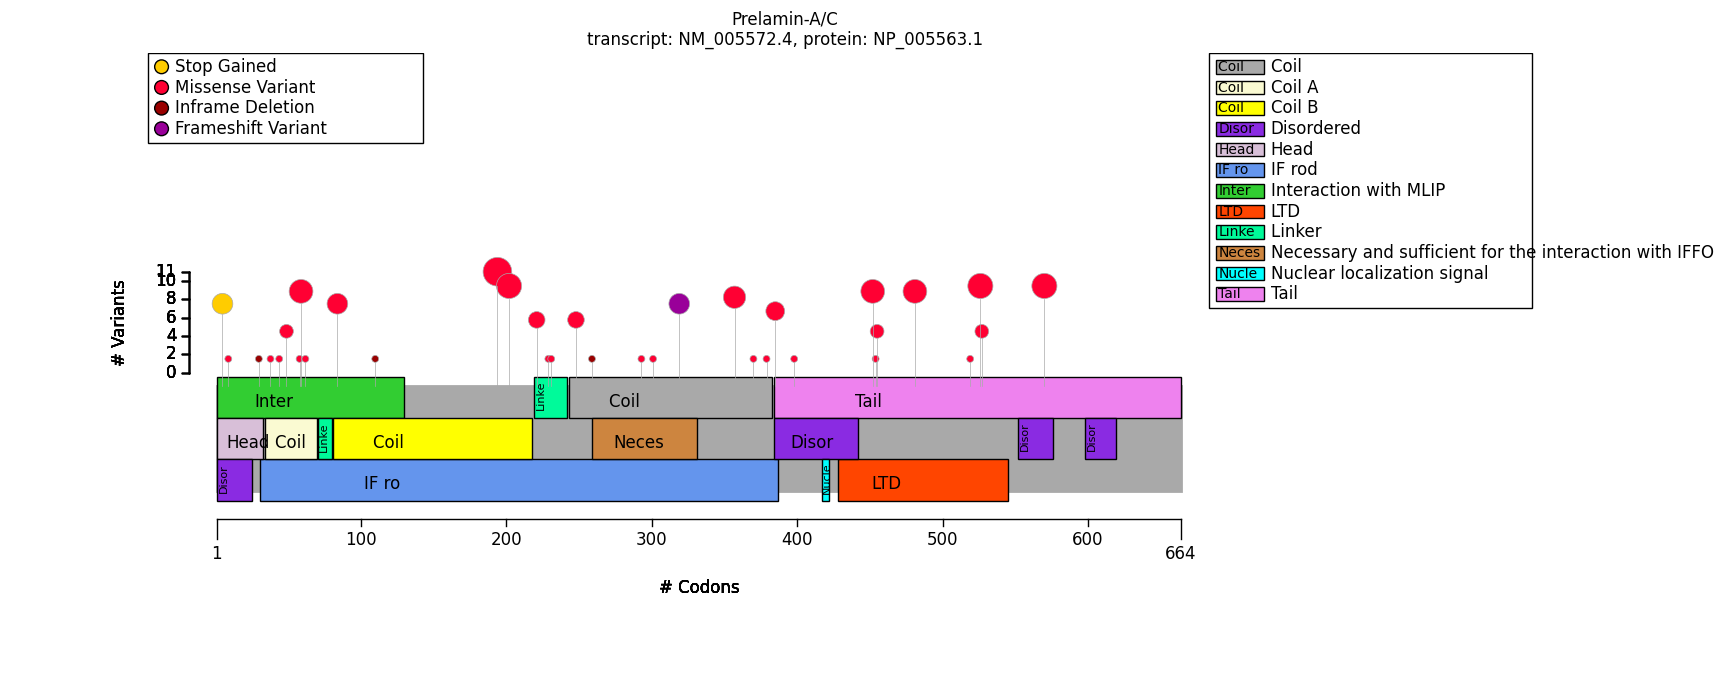

In [8]:
from gpsea.view import ProteinVisualizer

drawer = ProteinVisualizer()
_ = drawer.draw_fig(pvis=pvis)

## Allele report

In [9]:
from gpsea.view import CohortVariantViewer

viewer = CohortVariantViewer(tx_id=mane_tx_id)
report = viewer.process(cohort)
display(HTML(report))

Variant key,Variant (cDNA),Variant (protein),Effects,Count
1_156138613_156138613_C_T,1_156138613_156138613_C_T,None,downstream of gene,15
1_156134474_156134474_C_A,c.585C>A,p.Asn195Lys,missense,11
1_156134497_156134497_A_G,c.608A>G,p.Glu203Gly,missense,8
1_156137204_156137204_G_C,c.1580G>C,p.Arg527Pro,missense,8
1_156137756_156137756_C_A,c.1711C>A,p.Arg571Ser,missense,8
1_156115096_156115096_C_G,c.178C>G,p.Arg60Gly,missense,7
1_156136984_156136984_C_T,c.1444C>T,p.Arg482Trp,missense,7
1_156136413_156136413_C_T,c.1357C>T,p.Arg453Trp,missense,6
1_156136036_156136036_G_A,c.1072G>A,p.Glu358Lys,missense,6
1_156114934_156114934_C_T,c.16C>T,p.Gln6Ter,stop gained,5


# Configure genotype phenotype analysis

## Genotype predicate

Test Missense variants vs. the others.

<span style='color: red'>IMPORTANT - genotype predicate should be tailored to your analysis!</span>

In [10]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate.genotype import VariantPredicates, autosomal_dominant

is_missense = VariantPredicates.variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)
gt_predicate = autosomal_dominant(is_missense)

## Phenotype predicate

In [11]:
from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest

pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

## MTC filter, MTC correction, and statistic

In [12]:
from gpsea.analysis.pcats.stats import FisherExactTest
from gpsea.analysis.mtc_filter import HpoMtcFilter

mtc_filter = HpoMtcFilter.default_filter(hpo=hpo, term_frequency_threshold=0.2)
mtc_correction = 'fdr_bh'
statistic = FisherExactTest()

## Assemble the analysis

In [13]:
from gpsea.analysis.pcats import HpoTermAnalysis

analysis = HpoTermAnalysis(
    count_statistic=statistic,
    mtc_filter=mtc_filter,
    mtc_correction=mtc_correction,
    mtc_alpha=0.05,
)

# Execute the analysis

In [14]:
result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_predicate,
    pheno_predicates=pheno_predicates,
)

## Show MTC report

In [15]:
from gpsea.view import MtcStatsViewer

viewer = MtcStatsViewer()
report = viewer.process(result)
display(HTML(report))

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.2,6
HMF03,Skipping term because of a child term with the same individual counts,2
HMF04,Skipping term because all genotypes have same HPO observed proportions,87
HMF05,Skipping term because one genotype had zero observations,62
HMF06,Skipping term with less than 7 observations (not powered for 2x2),108
HMF08,Skipping general term,96


## Summarize the HPO terms

In [16]:
from gpsea.view import summarize_hpo_analysis

report = summarize_hpo_analysis(hpo=hpo, result=result)
report

What is the genotype group                         HOM_REF            HET  \
                                                     Count Percent  Count   
Lipodystrophy [HP:0009125]                           16/28     57%   9/82   
Abnormal atrioventricular conduction [HP:0005150]      2/4     50%  33/33   
Cardiac conduction abnormality [HP:0031546]            3/5     60%  33/33   
Prominent superficial blood vessels [HP:0007394]     15/16     94%    0/2   
Alopecia [HP:0001596]                                15/16     94%    0/2   
Failure to thrive [HP:0001508]                       15/16     94%    0/2   
Reduced subcutaneous adipose tissue [HP:0003758]     15/16     94%    0/2   
Micrognathia [HP:0000347]                            15/16     94%    0/2   
Proptosis [HP:0000520]                               15/16     94%    0/2   
Increased circulating creatine kinase MM isofor...     3/3    100%    0/4   
Short stature [HP:0004322]                           15/16     94%    1/3   
Elevated circulating creatine kinase concentrat...     5/5    100%  26/52   
Abnormal left ventricular ejection fraction [HP...     3/7     43%   2/25   
Left ventricular systolic dysfunction [HP:0025169]     3/7     43%   2/25   
Reduced left ventricular ejection fraction [HP:...     3/8     38%   2/29   
Respiratory insufficiency due to muscle weaknes...     0/2      0%  11/13   
Heart block [HP:0012722]                               3/5     60%  14/14   
Atrioventricular block [HP:0001678]                    2/5     40%  14/16   
Abnormal left ventricular function [HP:0005162]       6/10     60%   8/31   
Reduced bone mineral density [HP:0004349]            15/16     94%    2/4   
Mildly reduced left ventricular ejection fracti...     2/7     29%   1/28   
Ventricular tachycardia [HP:0004756]                   2/4     50%   1/13   
First degree atrioventricular block [HP:0011705]       0/3      0%    5/7   
Third degree atrioventricular block [HP:0001709]       0/3      0%    5/7   
Cardiomyopathy [HP:0001638]                            1/2     50%  27/29   
Tube feeding [HP:0033454]                              1/2     50%   2/13   
Highly elevated creatine kinase [HP:0030234]           1/1    100%  15/41   
Sudden cardiac death [HP:0001645]                      1/1    100%  11/27   
Talipes [HP:0001883]                                   0/2      0%   6/16   
Abnormal circulating creatine kinase concentrat...     8/8    100%  26/30   
Second degree atrioventricular block [HP:0011706]      2/5     40%    4/6   
Loss of ambulation [HP:0002505]                        1/3     33%   9/16   
Talipes equinovarus [HP:0001762]                       0/2      0%   3/13   
Atrial fibrillation [HP:0005110]                       1/1    100%  24/40   
Dilated cardiomyopathy [HP:0001644]                    1/2     50%  26/42   
Decreased HDL cholesterol concentration [HP:000...     1/1    100%   9/11   
Hyperglycemia [HP:0003074]                             1/1    100%    7/8   
Neck muscle weakness [HP:0000467]                      2/2    100%  10/13   
Decreased fetal movement [HP:0001558]                  0/2      0%   3/13   

What is the genotype group                                                     \
                                                   Percent Corrected p values   
Lipodystrophy [HP:0009125]                             11%           0.000104   
Abnormal atrioventricular conduction [HP:0005150]     100%           0.084967   
Cardiac conduction abnormality [HP:0031546]           100%           0.084967   
Prominent superficial blood vessels [HP:0007394]        0%           0.084967   
Alopecia [HP:0001596]                                   0%           0.084967   
Failure to thrive [HP:0001508]                          0%           0.084967   
Reduced subcutaneous adipose tissue [HP:0003758]        0%           0.084967   
Micrognathia [HP:0000347]                               0%           0.084967   
Proptosis [HP:0000520]          

In [17]:
from gpsea.model.genome import Region
upstream_nls = Region(1, 416)
in_upstream_nls = VariantPredicates.region(upstream_nls, mane_tx_id) 
gt_upstream_predicate = autosomal_dominant(in_upstream_nls)

In [18]:
upstream_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_upstream_predicate,
    pheno_predicates=pheno_predicates,
)

In [19]:
upstream_report = summarize_hpo_analysis(hpo=hpo, result=upstream_result)
upstream_report

What is the genotype group                         HOM_REF            HET  \
                                                     Count Percent  Count   
Lipodystrophy [HP:0009125]                           21/47     45%   4/63   
Highly elevated creatine kinase [HP:0030234]         12/20     60%   4/22   
Prominent superficial blood vessels [HP:0007394]     15/16     94%    0/2   
Alopecia [HP:0001596]                                15/16     94%    0/2   
Failure to thrive [HP:0001508]                       15/16     94%    0/2   
Reduced subcutaneous adipose tissue [HP:0003758]     15/16     94%    0/2   
Micrognathia [HP:0000347]                            15/16     94%    0/2   
Proptosis [HP:0000520]                               15/16     94%    0/2   
Sudden cardiac death [HP:0001645]                      0/6      0%  12/22   
Respiratory insufficiency due to muscle weaknes...     1/4     25%  10/11   
Short stature [HP:0004322]                           15/16     94%    1/3   
Talipes equinovarus [HP:0001762]                       3/7     43%    0/8   
Reduced bone mineral density [HP:0004349]            15/16     94%    2/4   
Elevated circulating creatine kinase concentrat...   17/25     68%  14/32   
Loss of ambulation [HP:0002505]                        1/5     20%   9/14   
Increased circulating creatine kinase MM isofor...     0/3      0%    3/4   
Dilated cardiomyopathy [HP:0001644]                   4/10     40%  23/34   
Bilateral talipes equinovarus [HP:0001776]             2/6     33%    0/8   
Abnormal left ventricular function [HP:0005162]       3/16     19%  11/25   
Atrial fibrillation [HP:0005110]                       4/9     44%  21/32   
Reduced left ventricular ejection fraction [HP:...    1/17      6%   4/20   
Abnormal left ventricular ejection fraction [HP...    1/14      7%   4/18   
Left ventricular systolic dysfunction [HP:0025169]    1/14      7%   4/18   
Cardiomyopathy [HP:0001638]                            4/5     80%  24/26   
Hyperglycemia [HP:0003074]                             5/5    100%    3/4   
Decreased HDL cholesterol concentration [HP:000...     6/8     75%    4/4   
Neck muscle weakness [HP:0000467]                      4/4    100%   8/11   
Decreased fetal movement [HP:0001558]                  0/4      0%   3/11   
Third degree atrioventricular block [HP:0001709]       3/4     75%    2/6   
Ventricular tachycardia [HP:0004756]                   0/4      0%   3/13   
Abnormal circulating creatine kinase concentrat...   17/20     85%  17/18   
Atrioventricular block [HP:0001678]                    6/7     86%  10/14   
Talipes [HP:0001883]                                   3/7     43%   3/11   
Abnormal atrioventricular conduction [HP:0005150]      7/7    100%  28/30   
Cardiac conduction abnormality [HP:0031546]            7/7    100%  29/31   
First degree atrioventricular block [HP:0011705]       2/3     67%    3/7   
Heart block [HP:0012722]                               6/6    100%  11/13   
Increased LDL cholesterol concentration [HP:000...     2/5     40%    0/2   
Second degree atrioventricular block [HP:0011706]      1/2     50%    5/9   
Tube feeding [HP:0033454]                              1/4     25%   2/11   

What is the genotype group                                                     \
                                                   Percent Corrected p values   
Lipodystrophy [HP:0009125]                              6%           0.000173   
Highly elevated creatine kinase [HP:0030234]           18%           0.098039   
Prominent superficial blood vessels [HP:0007394]        0%           0.098039   
Alopecia [HP:0001596]                                   0%           0.098039   
Failure to thrive [HP:0001508]                          0%           0.098039   
Reduced subcutaneous adipose tissue [HP:0003758]        0%           0.098039   
Micrognathia [HP:0000347]                               0%           0.098039   
Proptosis [HP:0000520]              

In [20]:
cardiac_phenotypes = ("HP:0001644","HP:0005110")

In [21]:
from gpsea.analysis.pscore import CountingPhenotypeScorer
from gpsea.analysis.pscore.stats import MannWhitneyStatistic
from gpsea.analysis.pscore import PhenotypeScoreAnalysis

scorer = CountingPhenotypeScorer.from_query_curies(hpo, cardiac_phenotypes)
score_stats = MannWhitneyStatistic()
score_analysis = PhenotypeScoreAnalysis(score_stats)


In [22]:
score_results = score_analysis.compare_genotype_vs_phenotype_score(cohort, gt_upstream_predicate, scorer)
score_results.pval

0.000997837171503174

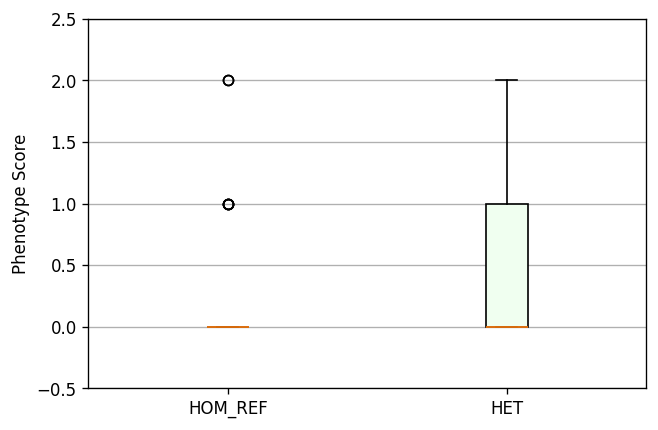

In [28]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize = (6,4), dpi = 120)
score_results.plot_boxplots(gt_upstream_predicate, ax)
_= ax.grid(axis="y")
_= ax.set(ylabel="Phenotype Score", ylim=(-0.5, 2.5))

In [23]:
upstream_tail = Region(1, 383)
in_upstream_tail = VariantPredicates.region(upstream_tail, mane_tx_id) 
gt_upstream_t_predicate = autosomal_dominant(in_upstream_tail)

In [24]:
upstream_t_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_upstream_t_predicate,
    pheno_predicates=pheno_predicates,
)

In [25]:
upstream_t_report = summarize_hpo_analysis(hpo=hpo, result=upstream_t_result)
upstream_t_report

What is the genotype group                         HOM_REF            HET  \
                                                     Count Percent  Count   
Lipodystrophy [HP:0009125]                           22/52     42%   3/58   
Highly elevated creatine kinase [HP:0030234]         13/21     62%   3/21   
Elevated circulating creatine kinase concentrat...   20/28     71%  11/29   
Sudden cardiac death [HP:0001645]                      0/6      0%  12/22   
Respiratory insufficiency due to muscle weaknes...     1/4     25%  10/11   
Dilated cardiomyopathy [HP:0001644]                   4/11     36%  23/33   
Talipes equinovarus [HP:0001762]                       3/7     43%    0/8   
Cardiomyopathy [HP:0001638]                            4/6     67%  24/25   
Abnormal left ventricular function [HP:0005162]       4/20     20%  10/21   
Loss of ambulation [HP:0002505]                        1/5     20%   9/14   
Increased circulating creatine kinase MM isofor...     0/3      0%    3/4   
Reduced left ventricular ejection fraction [HP:...    1/20      5%   4/17   
Abnormal left ventricular ejection fraction [HP...    1/17      6%   4/15   
Left ventricular systolic dysfunction [HP:0025169]    1/17      6%   4/15   
Bilateral talipes equinovarus [HP:0001776]             2/6     33%    0/8   
Prominent superficial blood vessels [HP:0007394]     15/17     88%    0/1   
Alopecia [HP:0001596]                                15/17     88%    0/1   
Failure to thrive [HP:0001508]                       15/17     88%    0/1   
Reduced subcutaneous adipose tissue [HP:0003758]     15/17     88%    0/1   
Micrognathia [HP:0000347]                            15/17     88%    0/1   
Proptosis [HP:0000520]                               15/17     88%    0/1   
Atrial fibrillation [HP:0005110]                       4/9     44%  21/32   
Short stature [HP:0004322]                           15/17     88%    1/2   
Hyperglycemia [HP:0003074]                             6/6    100%    2/3   
Reduced bone mineral density [HP:0004349]            15/17     88%    2/3   
Neck muscle weakness [HP:0000467]                      4/4    100%   8/11   
Decreased fetal movement [HP:0001558]                  0/4      0%   3/11   
Ventricular tachycardia [HP:0004756]                   0/4      0%   3/13   
Second degree atrioventricular block [HP:0011706]      1/3     33%    5/8   
Talipes [HP:0001883]                                   3/7     43%   3/11   
Abnormal circulating creatine kinase concentrat...   20/23     87%  14/15   
Abnormal atrioventricular conduction [HP:0005150]      7/7    100%  28/30   
Cardiac conduction abnormality [HP:0031546]            7/7    100%  29/31   
Atrioventricular block [HP:0001678]                    6/8     75%  10/13   
Heart block [HP:0012722]                               6/6    100%  11/13   
Decreased HDL cholesterol concentration [HP:000...     7/9     78%    3/3   
Third degree atrioventricular block [HP:0001709]       3/5     60%    2/5   
Increased LDL cholesterol concentration [HP:000...     2/5     40%    0/2   
Tube feeding [HP:0033454]                              1/4     25%   2/11   

What is the genotype group                                                     \
                                                   Percent Corrected p values   
Lipodystrophy [HP:0009125]                              5%           0.000103   
Highly elevated creatine kinase [HP:0030234]           14%           0.069381   
Elevated circulating creatine kinase concentrat...     38%           0.217228   
Sudden cardiac death [HP:0001645]                      55%           0.231159   
Respiratory insufficiency due to muscle weaknes...     91%           0.257143   
Dilated cardiomyopathy [HP:0001644]                    70%           0.309524   
Talipes equinovarus [HP:0001762]                        0%           0.309524   
Cardiomyopathy [HP:0001638]                            96%           0.309524   
Abnormal left ventricular functi

In [26]:
score_t_results = score_analysis.compare_genotype_vs_phenotype_score(cohort, gt_upstream_t_predicate, scorer)
score_t_results.pval

0.00015810529620953776

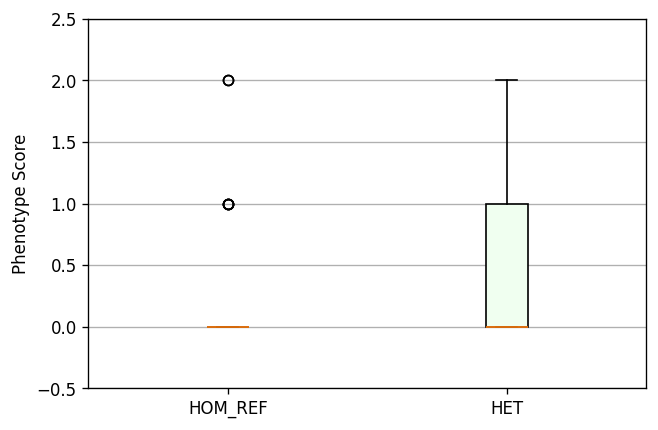

In [29]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 120)
score_t_results.plot_boxplots(gt_upstream_t_predicate, ax)
_= ax.grid(axis="y")
_= ax.set(ylabel="Phenotype Score", ylim=(-0.5, 2.5))

In [30]:
common_variant = VariantPredicates.variant_key('1_156138613_156138613_C_T')
gt_common_var_pred = autosomal_dominant(common_variant)

In [31]:
common_var_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_common_var_pred,
    pheno_predicates=pheno_predicates,
)

In [32]:
common_var_report = summarize_hpo_analysis(hpo, common_var_result)
common_var_report

What is the genotype group                       HOM_REF            HET  \
                                                   Count Percent  Count   
Lipodystrophy [HP:0009125]                         10/95     11%  15/15   
Prominent superficial blood vessels [HP:0007394]     0/3      0%  15/15   
Alopecia [HP:0001596]                                0/3      0%  15/15   
Failure to thrive [HP:0001508]                       0/3      0%  15/15   
Reduced subcutaneous adipose tissue [HP:0003758]     0/3      0%  15/15   
Micrognathia [HP:0000347]                            0/3      0%  15/15   
Proptosis [HP:0000520]                               0/3      0%  15/15   
Short stature [HP:0004322]                           1/4     25%  15/15   
Reduced bone mineral density [HP:0004349]            2/5     40%  15/15   

What is the genotype group                                                   \
                                                 Percent Corrected p values   
Lipodystrophy [HP:0009125]                          100%       2.502113e-11   
Prominent superficial blood vessels [HP:0007394]    100%       1.575630e-03   
Alopecia [HP:0001596]                               100%       1.575630e-03   
Failure to thrive [HP:0001508]                      100%       1.575630e-03   
Reduced subcutaneous adipose tissue [HP:0003758]    100%       1.575630e-03   
Micrognathia [HP:0000347]                           100%       1.575630e-03   
Proptosis [HP:0000520]                              100%       1.575630e-03   
Short stature [HP:0004322]                          100%       4.643963e-03   
Reduced bone mineral density [HP:0004349]           100%       8.771930e-03   

What is the genotype group                                      
                                                      p values  
Lipodystrophy [HP:0009125]                        2.780126e-12  
Prominent superficial blood vessels [HP:0007394]  1.225490e-03  
Alopecia [HP:0001596]                             1.225490e-03  
Failure to thrive [HP:0001508]                    1.225490e-03  
Reduced subcutaneous adipose tissue [HP:0003758]  1.225490e-03  
Micrognathia [HP:0000347]                         1.225490e-03  
Proptosis [HP:0000520]                            1.225490e-03  
Short stature [HP:0004322]                        4.127967e-03  
Reduced bone mineral density [HP:0004349]         8.771930e-03